In [27]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import glob

from keras.models import load_model

In [28]:
import os

In [29]:
os.getcwd()

'C:\\Users\\aswal\\Downloads\\Images'

In [30]:
os.chdir('C:\\Users\\aswal\\Downloads\\Images')

In [31]:
model = load_model('best_model.h5')

In [32]:
dict_word = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X', 24:'Y',25:'Z'}

In [33]:
images = [cv.imread(file) for file in glob.glob("*.jpg")]

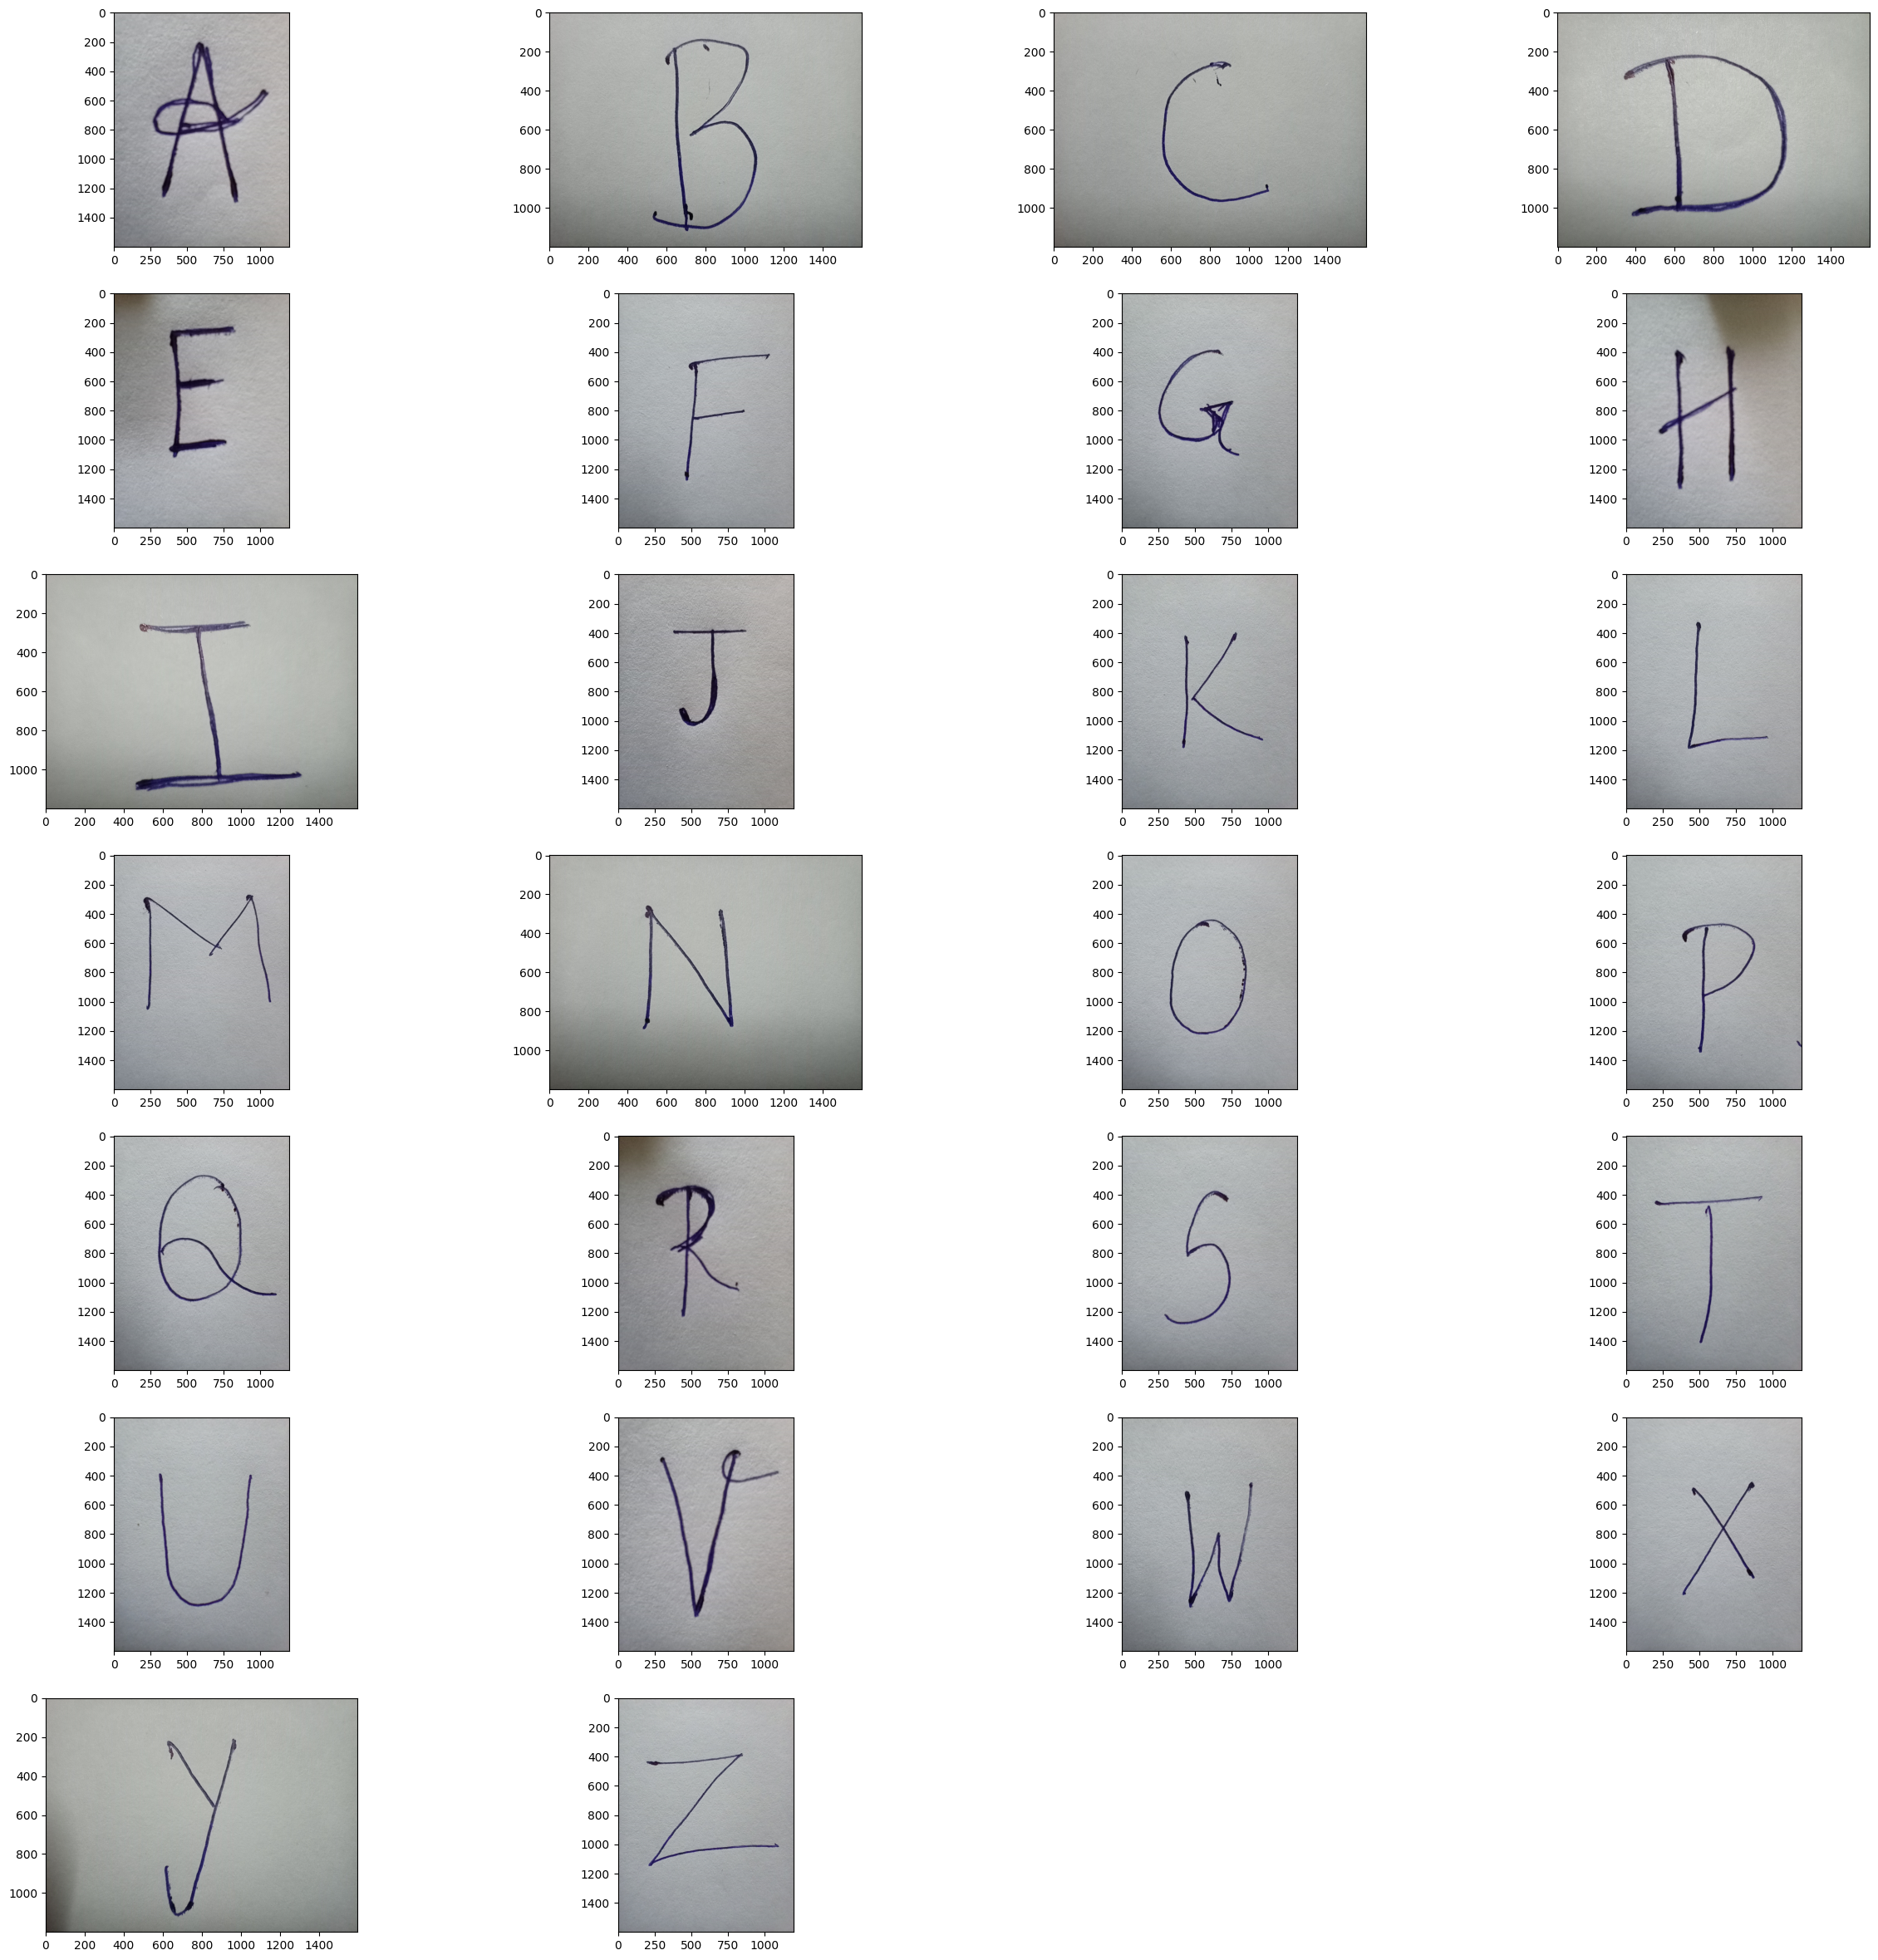

In [34]:
fig, axes = plt.subplots(7, 4, figsize=(30, 30))
axes = axes.flatten()
for i in range(len(images)):
    axes[i].imshow(cv.cvtColor(images[i], cv.COLOR_BGR2RGB))  # Convert BGR to RGB for correct color display
plt.delaxes(ax=axes[26])  # Remove blank axes if you have less than 28 images
plt.delaxes(ax=axes[27])
plt.show()

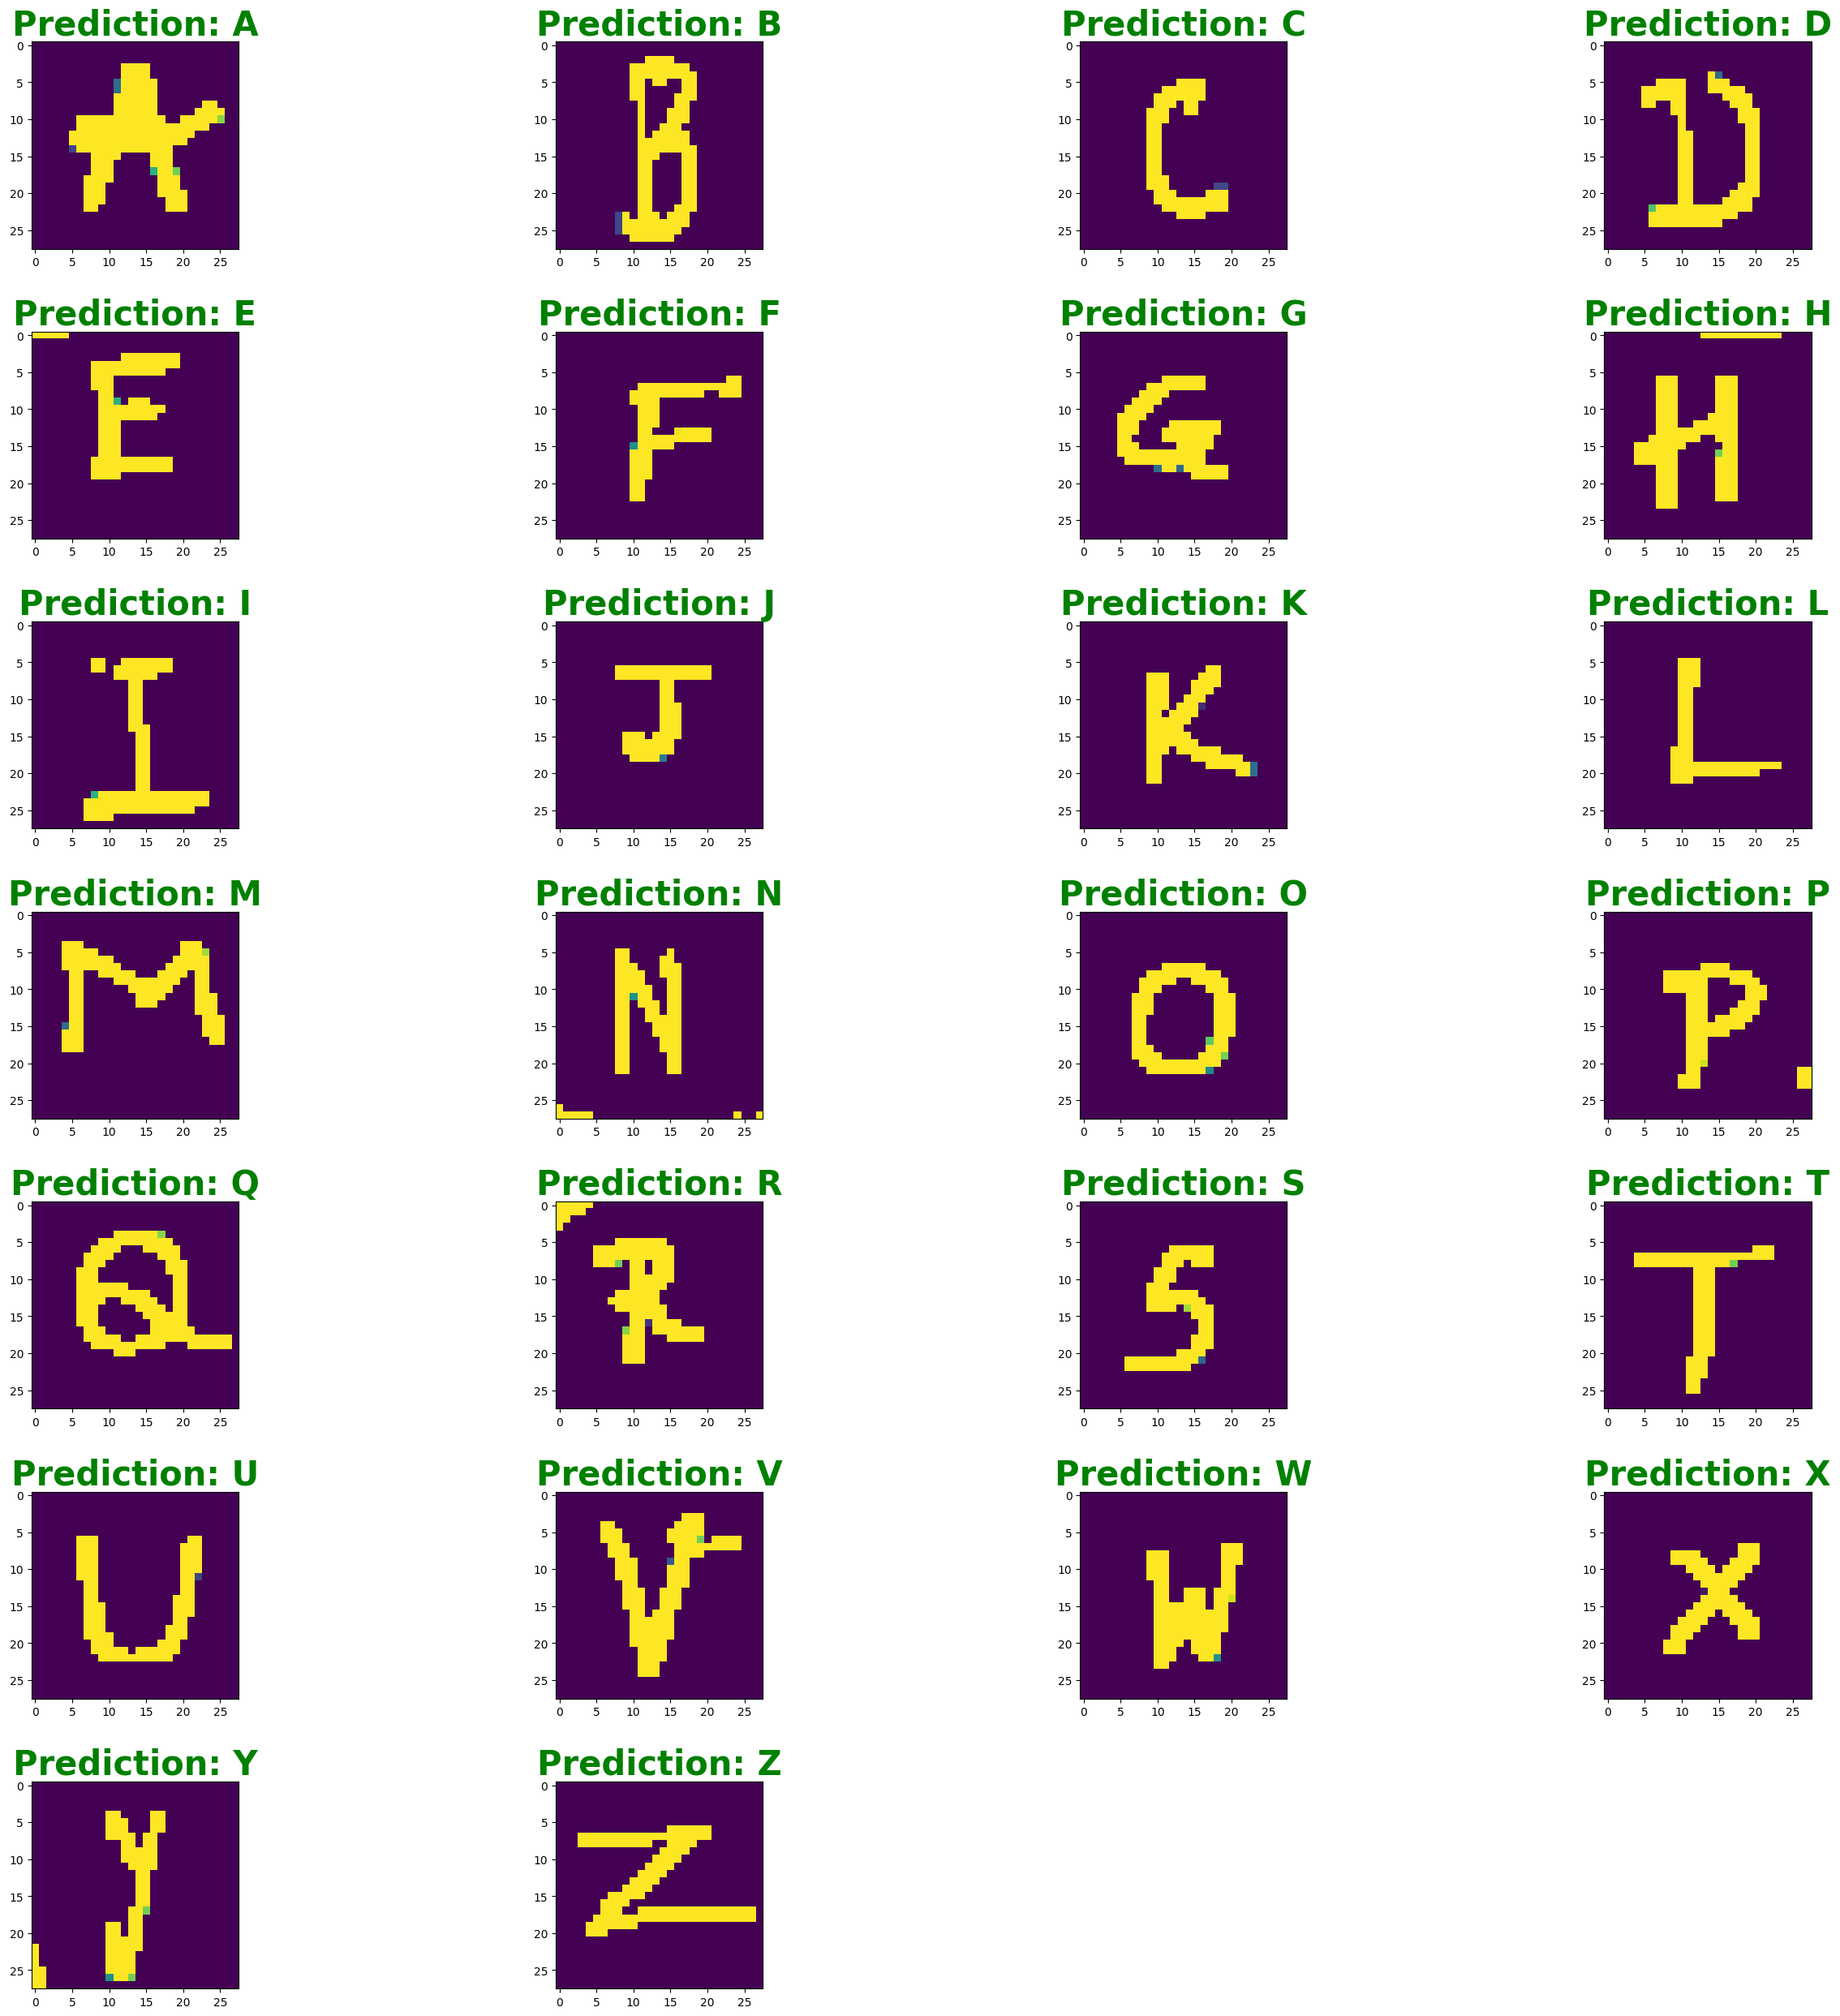

In [35]:
fig, axes = plt.subplots(7, 4, figsize = (30, 30))
axes = axes.flatten()

for i in range(len(images)):
    gray = cv.cvtColor(images[i], cv.COLOR_BGR2GRAY)
    gray = cv.medianBlur(gray,5)
    ret,gray = cv.threshold(gray,75,180,cv.THRESH_BINARY)

    element = cv.getStructuringElement(cv.MORPH_RECT,(90,90))
    gray = cv.morphologyEx(gray,cv.MORPH_GRADIENT,element)

    gray = gray/255. #downsampling
    #gray = 1 - gray
    gray = cv.resize(gray, (28,28)) #resizing

    #reshaping the image
    gray = np.reshape(gray, (28, 28))

    axes[i].imshow(gray)
    
    pred = dict_word[np.argmax(model.predict(np.reshape(gray,(1,28,28,1))))]
    axes[i].set_title("Prediction: " + pred, fontsize = 30, fontweight = 'bold', color = 'green')
    plt.subplots_adjust(left=0.1,bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)

#removing the unnecessary subplots
plt.delaxes(ax = axes[26])
plt.delaxes(ax = axes[27])
